<a href="https://colab.research.google.com/github/MonikaV08/class/blob/main/Vehicle_Routing_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#TASK 1 - Install matplotlib and deap
#       - Import all necessary libraries
!pip install matplotlib deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [16]:
# TODO: Task 2 - Define the number of locations and vehicles

num_locations =10  # Define the number of locations (eg 10)

locations = [(random.randint(0, 100),(random.randint(0,100))) for _ in range(num_locations)]
# Create a list of tuples representing location coordinates -
            # try to use a random number generator
            # (x, y) could be between 0 and 100

depot =(50,50) # Define the coordinates for the depot

num_vehicles = 3 # Define the number of vehicles - (eg 3)
print(num_locations)
print(locations)
print(depot)
print(num_vehicles)

10
[(34, 41), (36, 43), (70, 73), (16, 72), (62, 100), (43, 87), (97, 6), (5, 12), (80, 100), (58, 2)]
(50, 50)
3


In [30]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin", base.Fitness , weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin )

In [31]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual",  tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [32]:


def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        print(depot, individual)
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)

In [33]:
# TODO: Task 7 - Configure the genetic operators

toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

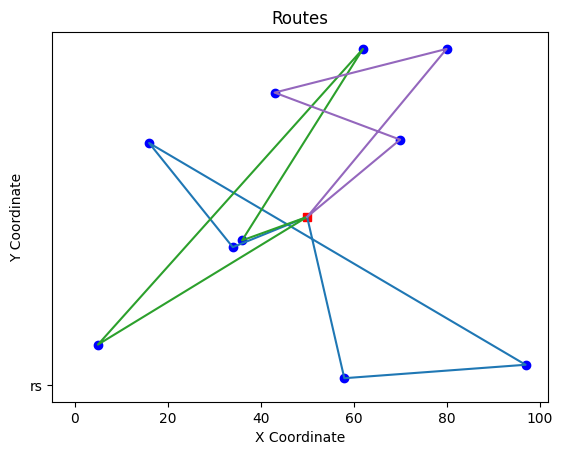

In [28]:
#TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()
coordinates=[(20,30),(30,40),(40,60),(50,70),(90,20)]
individual=[0,1,2,3,4,5,6,7,8,9]
plot_routes(individual)

Streaming output truncated to the last 5000 lines.
(50, 50) [3, 1, 6, 4, 0, 9, 8, 5, 7, 2]
(50, 50) [3, 1, 6, 4, 0, 9, 8, 5, 7, 2]
(50, 50) [3, 1, 6, 4, 0, 9, 8, 5, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8, 3, 7, 2]
(50, 50) [5, 1, 6, 4, 0, 9, 8

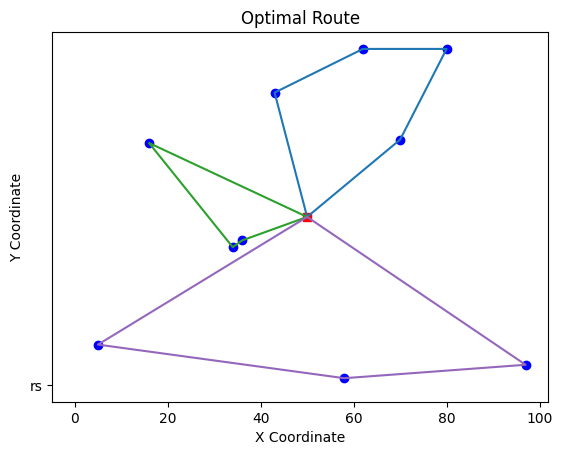

In [29]:
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()  # Call the main function and store its return values